In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [69]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [70]:
img=cv2.imread('Data/pennies.jpg')
sep_coin=img.copy()

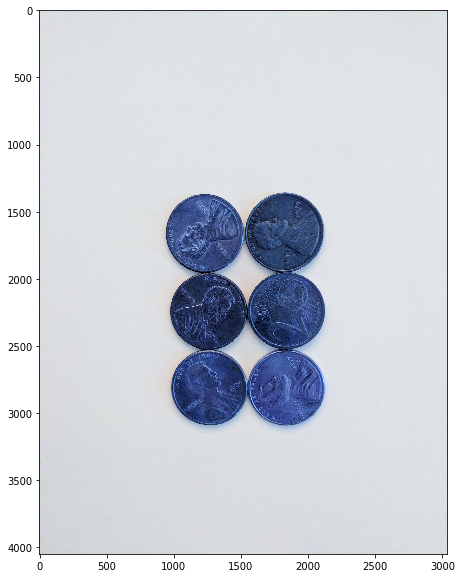

In [71]:
display(img)

In [72]:
img=cv2.medianBlur(img,35)

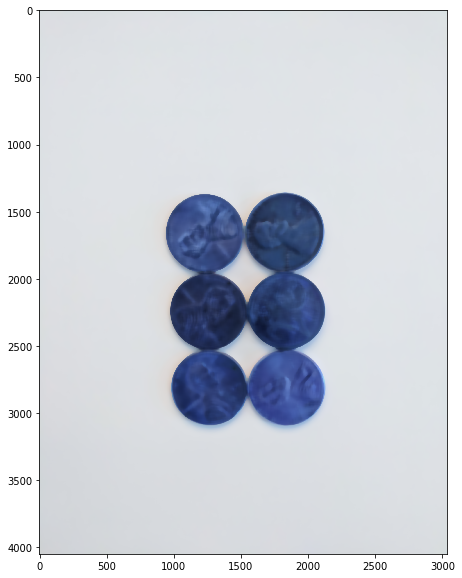

In [73]:
display(img)

In [74]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [75]:
ret, thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

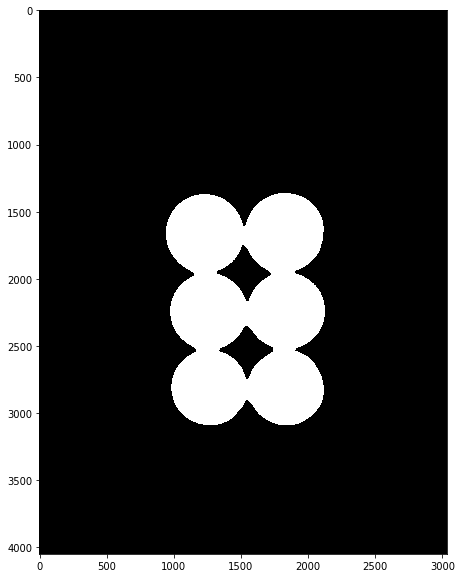

In [76]:
display(thresh)

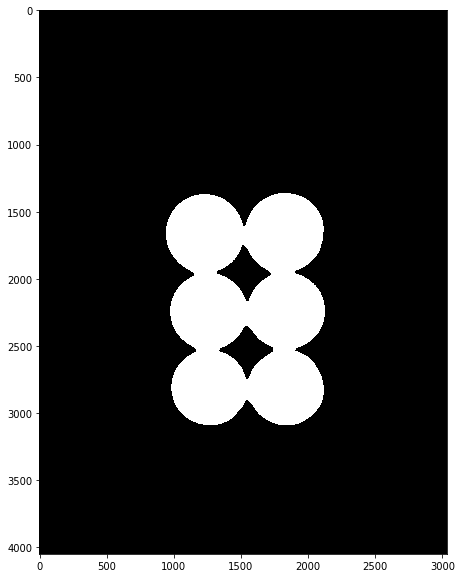

In [77]:
# NOISE REMOVAL (OPTIONAL HERE AS IT IS SIMPLE TASK BUT MANDATORY FOR A COMPLEX TASK)
kernal=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernal,iterations=2)
display(opening)

In [78]:
sure_bg=cv2.dilate(opening,kernal,iterations=3)

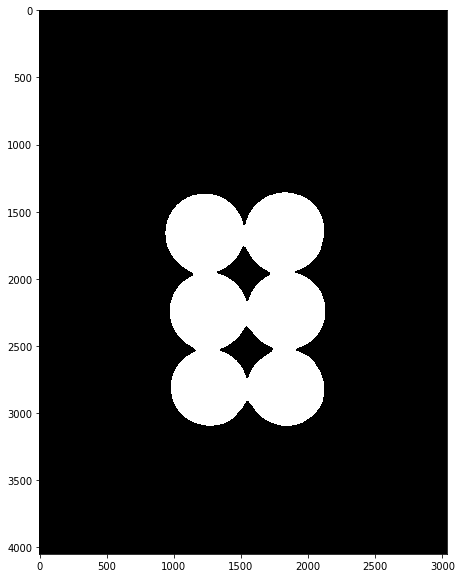

In [79]:
display(sure_bg)

In [80]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)

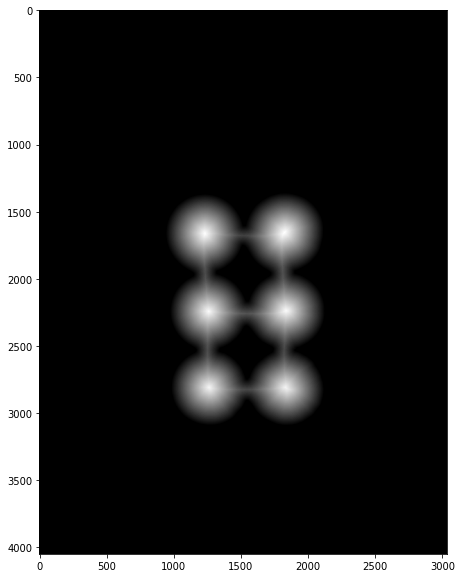

In [81]:
display(dist_transform)

In [82]:
ret,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

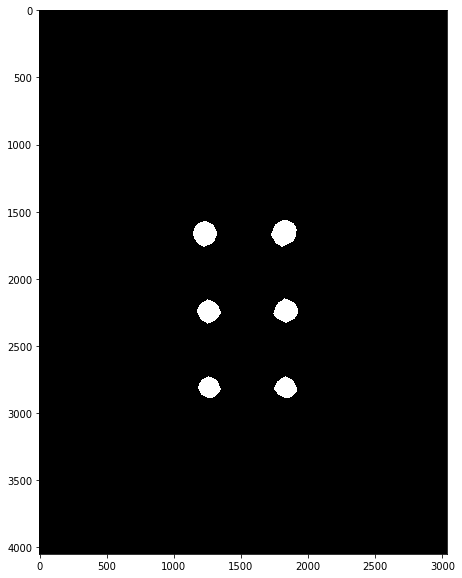

In [83]:
display(sure_fg)

In [84]:
sure_fg=np.uint8(sure_fg)

In [85]:
unknown=cv2.subtract(sure_bg,sure_fg)

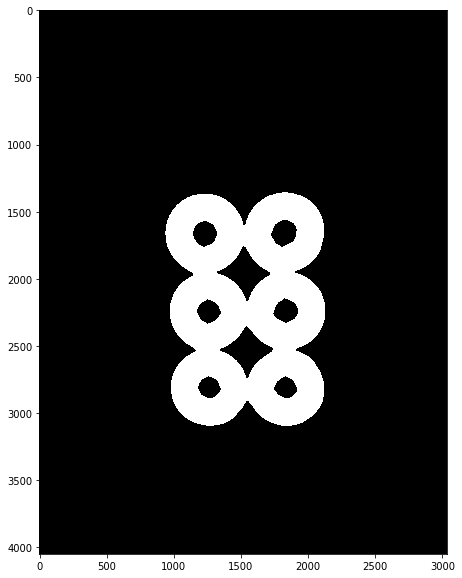

In [86]:
display(unknown)

In [87]:
ret, markers=cv2.connectedComponents(sure_fg)

In [88]:
markers=markers+1

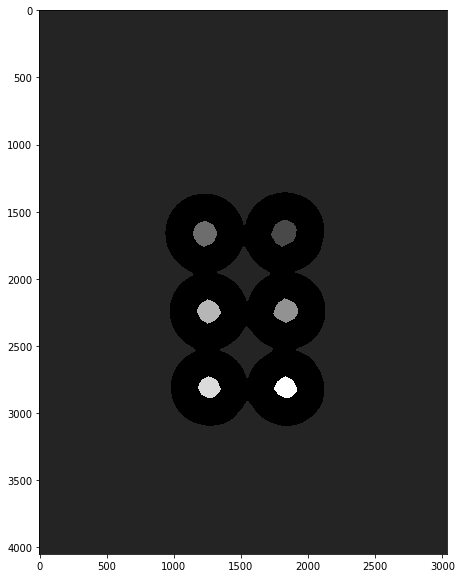

In [89]:
markers[unknown==255]=0
display(markers)

In [90]:
markers=cv2.watershed(img,markers)

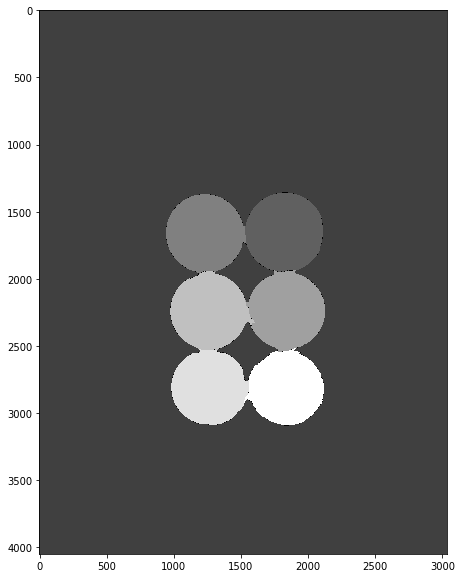

In [91]:
display(markers)

In [92]:
contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coin,contours,i,(255,0,0),10)

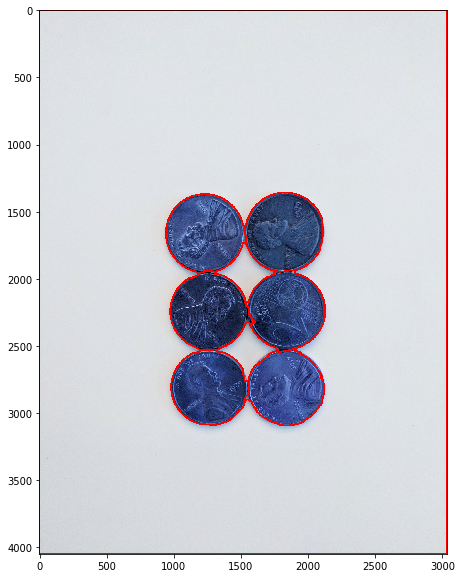

In [93]:
display(sep_coin)